<a href="https://colab.research.google.com/github/kirtilakhdh/ScikitLearnRegression/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/dataset/loan.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.value_counts()

Loan_ID   Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
LP001003  Male    Yes      1           Graduate      No             4583             1508.0             128.0       360.0             1.0             Rural          N              1
LP001005  Male    Yes      0           Graduate      Yes            3000             0.0                66.0        360.0             1.0             Urban          Y              1
LP002347  Male    Yes      0           Graduate      No             3246             1417.0             138.0       360.0             1.0             Semiurban      Y              1
LP002345  Male    Yes      0           Graduate      No             1025             2773.0             112.0       360.0             1.0             Rural          Y              1
LP002342  Male    Yes      2           Graduate      Yes            1600             20000.0   

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [ ]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

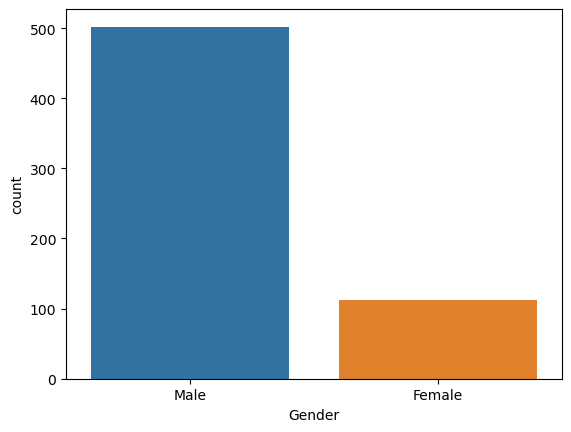

In [ ]:
sns.countplot(df['Gender'])

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

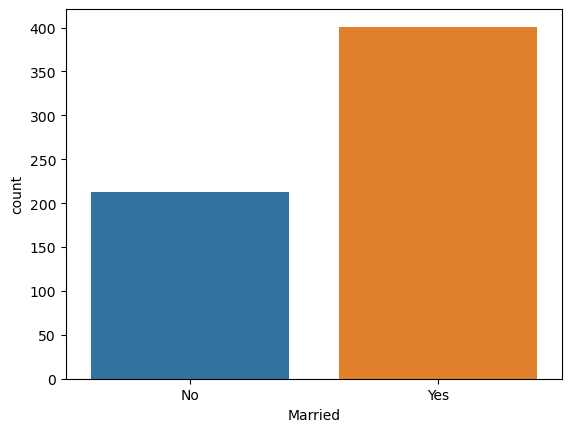

In [ ]:
sns.countplot(df['Married'])

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

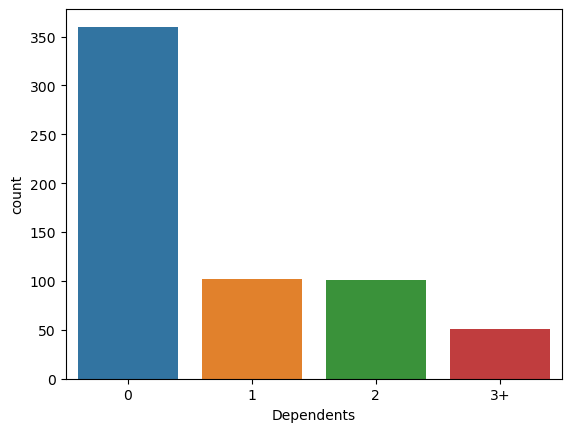

In [ ]:
sns.countplot(df['Dependents'])

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

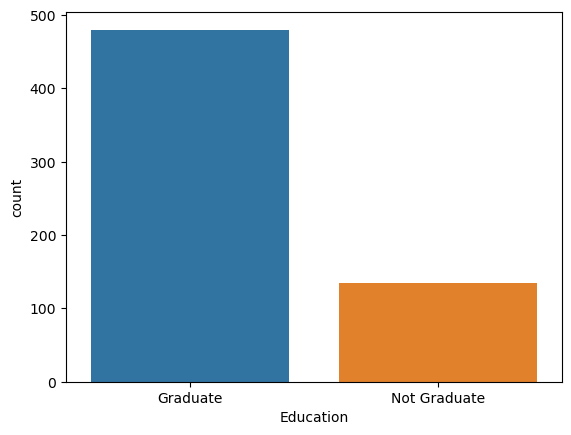

In [ ]:
sns.countplot(df['Education'])

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

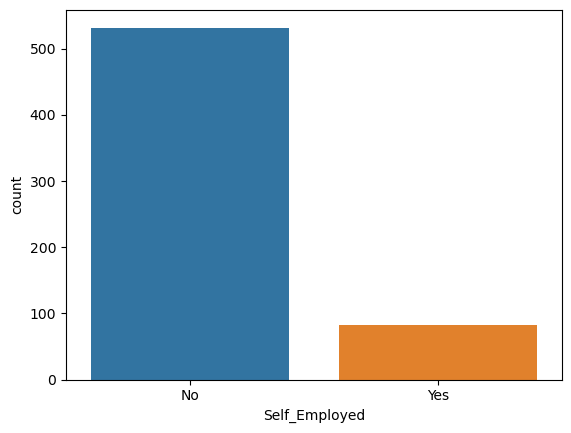

In [ ]:
sns.countplot(df['Self_Employed'])

F:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

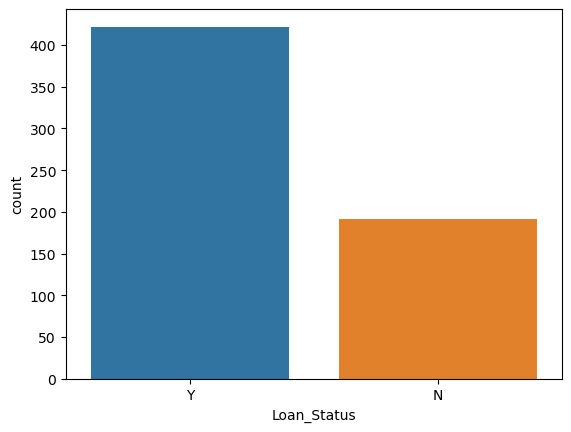

In [ ]:
sns.countplot(df['Loan_Status'])

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

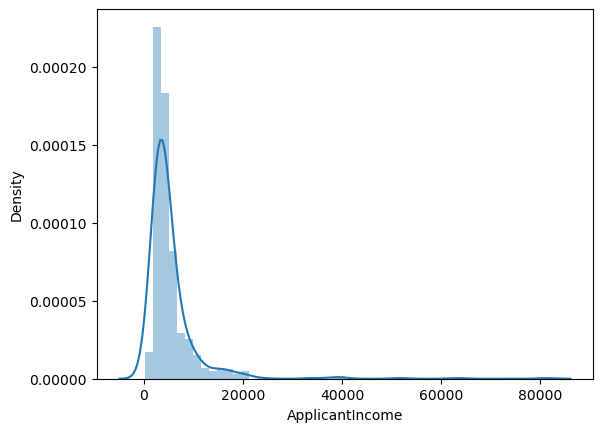

In [ ]:
sns.distplot(df['ApplicantIncome'])

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

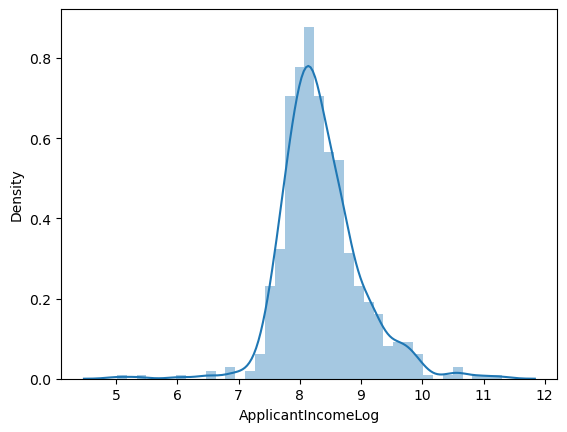

In [ ]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])


In [ ]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Density'>

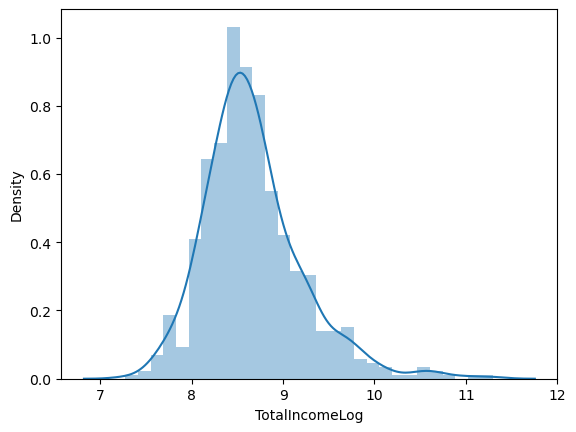

In [ ]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])
sns.distplot(df['TotalIncomeLog'])

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

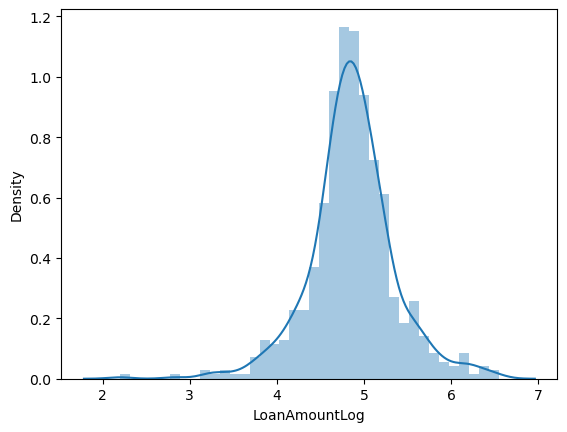

In [ ]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

F:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_TermLog', ylabel='Density'>

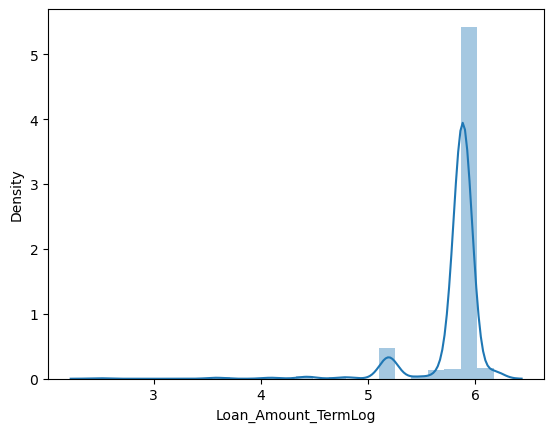

In [ ]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_TermLog'])

<AxesSubplot:>

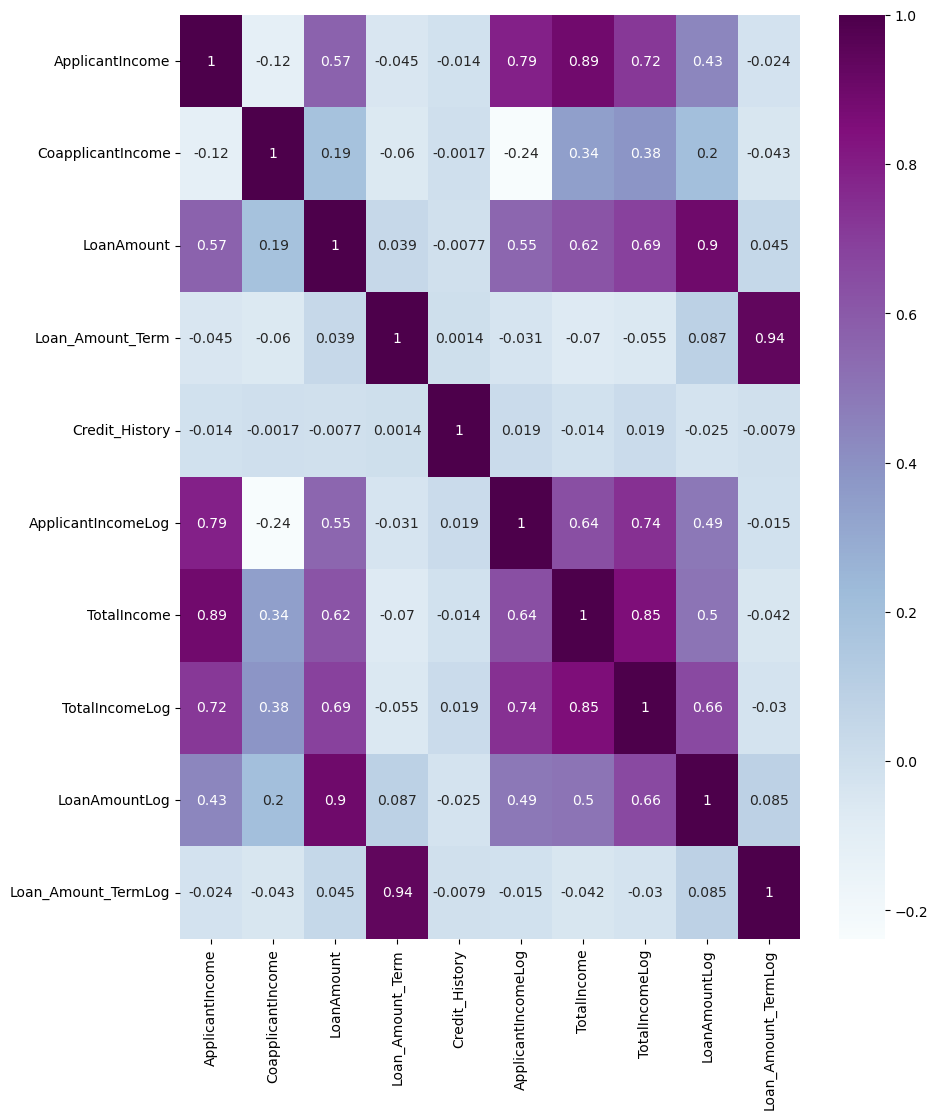

In [ ]:
corr = df.corr()
plt.figure(figsize = (10,12))
sns.heatmap(corr,annot = True,cmap = 'BuPu')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Loan_ID              614 non-null    object 
 1   Gender               614 non-null    object 
 2   Married              614 non-null    object 
 3   Dependents           614 non-null    object 
 4   Education            614 non-null    object 
 5   Self_Employed        614 non-null    object 
 6   ApplicantIncome      614 non-null    int64  
 7   CoapplicantIncome    614 non-null    float64
 8   LoanAmount           614 non-null    float64
 9   Loan_Amount_Term     614 non-null    float64
 10  Credit_History       614 non-null    float64
 11  Property_Area        614 non-null    object 
 12  Loan_Status          614 non-null    object 
 13  ApplicantIncomeLog   614 non-null    float64
 14  TotalIncome          614 non-null    float64
 15  TotalIncomeLog       614 non-null    flo

In [ ]:
cols = ['TotalIncome','ApplicantIncome','CoapplicantIncome','Dependents','Credit_History','Loan_Amount_Term','LoanAmount','Loan_ID','Property_Area']
df = df.drop(columns = cols,axis = 1)
        

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,Male,No,Graduate,No,Y,8.674026,8.674026,4.986426,5.886104
1,Male,Yes,Graduate,No,N,8.430109,8.714568,4.852030,5.886104
2,Male,Yes,Graduate,Yes,Y,8.006368,8.006368,4.189655,5.886104
3,Male,Yes,Not Graduate,No,Y,7.856707,8.505323,4.787492,5.886104
4,Male,No,Graduate,No,Y,8.699515,8.699515,4.948760,5.886104


In [ ]:
cols =['Gender','Married','Education','Self_Employed','Loan_Status'] 
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Gender,Married,Education,Self_Employed,Loan_Status,ApplicantIncomeLog,TotalIncomeLog,LoanAmountLog,Loan_Amount_TermLog
0,1,0,0,0,1,8.674026,8.674026,4.986426,5.886104
1,1,1,0,0,0,8.430109,8.714568,4.852030,5.886104
2,1,1,0,1,1,8.006368,8.006368,4.189655,5.886104
3,1,1,1,0,1,7.856707,8.505323,4.787492,5.886104
4,1,0,0,0,1,8.699515,8.699515,4.948760,5.886104


In [ ]:
df.isnull().sum()

Gender                 0
Married                0
Education              0
Self_Employed          0
Loan_Status            0
ApplicantIncomeLog     0
TotalIncomeLog         0
LoanAmountLog          0
Loan_Amount_TermLog    0
dtype: int64

In [ ]:
x = df.drop(columns = ['Loan_Status'],axis = 1)
y = df['Loan_Status']

In [ ]:
def classifier(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
    model.fit(x_train,y_train)
    print("Accuracy is",model.score(x_test,y_test) *100)
    score = cross_val_score(model,x,y,cv = 5)
    print("Cross validation is",np.mean(score)*100)

    

In [ ]:
model = DecisionTreeClassifier()
classifier(model,x,y)

Accuracy is 61.68831168831169
Cross validation is 58.632546981207526


In [ ]:
model = ExtraTreesClassifier()
classifier(model,x,y)
model = RandomForestClassifier()
classifier(model,x,y)

Accuracy is 63.63636363636363
Cross validation is 62.37238437958149
Accuracy is 64.93506493506493
Cross validation is 64.16366786618686


In [ ]:
model = RandomForestClassifier(n_estimators = 25,min_samples_split = 25,max_depth = 7,max_features = 1)
classifier(model,x,y)

Accuracy is 64.93506493506493
Cross validation is 67.26509396241504


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 8 46]
 [ 6 94]]


<AxesSubplot:>

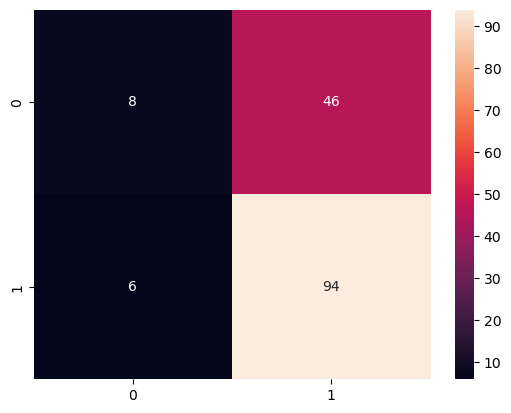

In [ ]:
sns.heatmap(cm,annot = True)